<h1 style="font-size:3rem;color:orange;">Directing User Subscriptions📱</h1>

<h2 style="font-size:2rem;color:orange;">EDA (Exploratory Data Analysis) and Feature Engineering</h2>

#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sn

#### Import Data

In [2]:
df_users = pd.read_csv("../data/raw/app-user-data.csv")

#### Raw Data Peek 👀

In [3]:
df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df_users.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


Here we generate an interactive [YData Profiling](https://docs.profiling.ydata.ai/4.6/) report of our processed data which we save to a HTML file 

In [5]:
%%capture
from ydata_profiling import ProfileReport

# The local directory to save the report
experiment_dir = "../data/raw"
if not os.path.exists(experiment_dir): os.makedirs(experiment_dir)

# Generate the report & save to a file
data_profile = ProfileReport(df_users, title="Profiling Report of app-user-data.csv")
data_profile.to_file(f"../data/raw/ProfileReport_app-user-data.html")

- To view in the notebook, create a new cell below with ```data_profile.to_notebook_iframe()```

- View the report in the web browser [here](https://ml-fintech-case-studies.netlify.app/profile_reports/app-user-data.html#overview) 👁️‍🗨️

  <img src="../../images/profile-report_subscriptions.png" width="600" alt="ProfileReport"/>

In [6]:
# Restore matplotlib to inline mode after viewing for plots
%matplotlib inline

# Data Cleaning <img src="https://media3.giphy.com/media/XPgZ5Mw89gX5oWxJbA/giphy.gif?cid=ecf05e47smjbcfh88elxmone9mj55ajymh0e6hkx30dshnq0&ep=v1_gifs_related&rid=giphy.gif&ct=s" width="50" alt="Stat Bars">

### Null Values

We observe there is no 'enrolled_date' for 18,926 of our samples due to users that did not enroll in the paid subscription. For now, we convert these values to "Not a Timestamp" to indicate that we recognize them and later process this field in Feature Engineering ⚒️

In [7]:
# Convert the 'first_open' and 'enrolled_date' columns to datetime format
df_users["first_open"] = pd.to_datetime(df_users["first_open"])
df_users["enrolled_date"] = pd.to_datetime(df_users["enrolled_date"])
# Convert null values in 'enrolled_date' 
missing_date = pd.NaT
# Fill missing values with a new date-time format
df_users["enrolled_date"] = df_users["enrolled_date"].fillna(pd.to_datetime(missing_date))


### Duplicate Rows

We observe in the profile report there are 15 duplicate rows in our dataset. Here we keep the first occurence and remove the rest

In [8]:
df_users = df_users.drop_duplicates(keep="first")
print("Remaining Samples: ", df_users.shape[0])

Remaining Samples:  49985


### Extractions

In [9]:
# Extract the hour directly
df_users.loc[:, 'hour'] = df_users['hour'].str.split(':').str[0].astype(int)
df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Outliers Function

In [10]:
from scipy.stats import zscore

def remove_outliers_with_threshold(your_threshold, your_df, column_name):
    """
    Accepts the threshold, a DataFrame, and the name of the column.
    Removes outliers beyond a threshold from a column within a DataFrame.
    """
    # Set the threshold for identifying outliers
    threshold = your_threshold
    # Calculate z-scores for the filter column
    z_scores = zscore(your_df[column_name])
    # Create a boolean mask to identify outliers
    outlier_mask = abs(z_scores) > threshold
    # Filter the DataFrame to exclude rows with outliers
    df_wo_outliers = your_df[~outlier_mask].copy()
    
    print(f"Filtered the DataFrame to exclude rows in '{column_name}' beyond a {your_threshold} threshold for identifying outliers")
    return df_wo_outliers

# Data Visualizations <img src="../../images/plot.gif" width="52" alt="Stat Bars">

- Numerical Features

In [11]:
numerical_features = ["age", "numscreens"]
df_users_numerical = df_users[numerical_features].copy()

- Categorical Features

In [12]:
categorical_features = ["first_open", "screen_list", "enrolled_date", "enrolled", "dayofweek", "hour", "minigame", "used_premium_feature", "liked"]
df_users_categorical = df_users[categorical_features].copy()

### Pair Plots

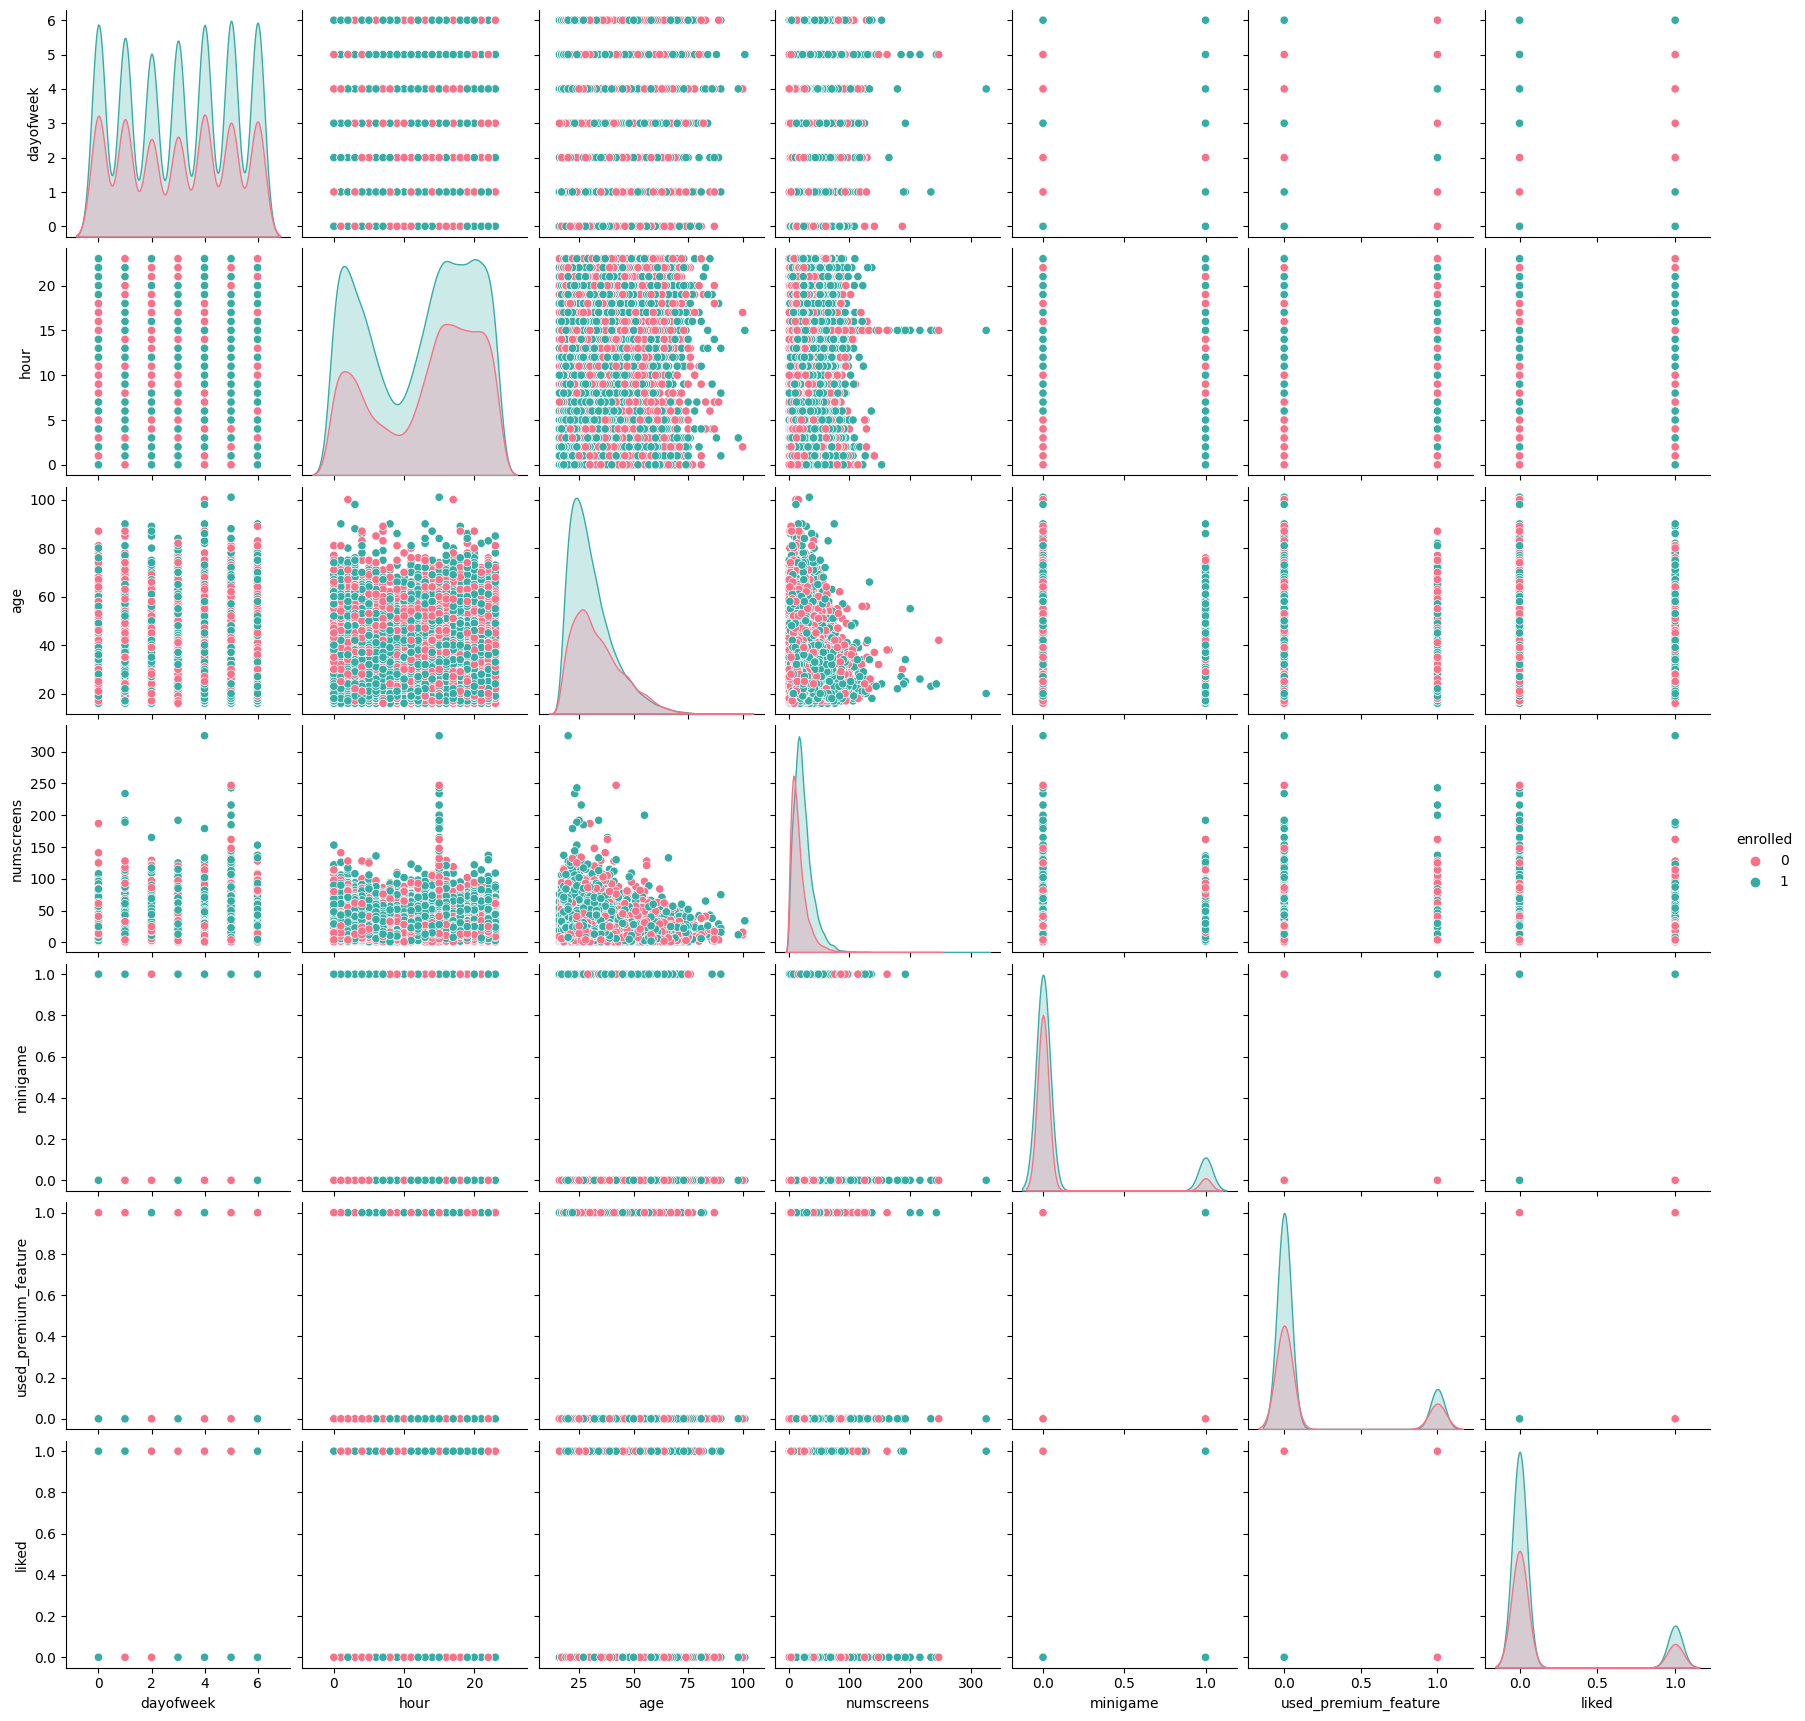

In [13]:
pairplot_df = df_users.copy().drop(columns=["user"])

# Seaborn pairplot passing the 'enrolled' label for hue
sn.pairplot(pairplot_df, hue="enrolled", palette="husl");

Process **'enrolled_date'** for exploration 

In [14]:
# Extract month and hour into separate columns for 'enrolled_date'
df_users_categorical["enrolled_date_month"] = df_users_categorical["enrolled_date"].dt.month
df_users_categorical["enrolled_date_hour"] = df_users_categorical["enrolled_date"].dt.hour

# Extract month into separate column for 'first_open'
df_users_categorical["first_open_month"] = df_users_categorical["first_open"].dt.month

# Display modified dataframe
df_users_categorical.head()

,first_open,screen_list,enrolled_date,enrolled,dayofweek,hour,minigame,used_premium_feature,liked,enrolled_date_month,enrolled_date_hour,first_open_month
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaT,0,3,2,0,0,0,NaN,NaN,12
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,Scan...",NaT,0,6,1,0,0,0,NaN,NaN,12
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaT,0,1,19,0,1,1,NaN,NaN,3
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513,1,4,16,0,0,0,7.0,16.0,7
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841,1,1,18,0,0,1,2.0,18.0,2


Inspect **'screen_list'** 

In [15]:
# Set maximum column width to display
pd.set_option("display.max_colwidth", None)

df_users_categorical[["enrolled", "screen_list"]].head()

,enrolled,screen_list
0,0,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login"
1,0,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2"
2,0,"Splash,Cycle,Loan"
3,1,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2"
4,1,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review"


- We observe potential insights within the **'screen_list'** field and will process this data in Feature Engineering ⚒️

In [16]:
# Reset maximum column width
pd.reset_option("display.max_colwidth")

### Histograms

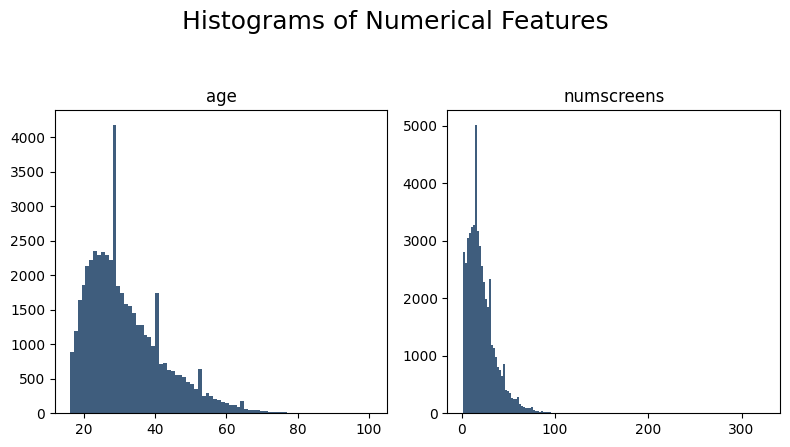

In [17]:
# Set figure size & title
plt.figure(figsize=(8, 8))
plt.suptitle("Histograms of Numerical Features", fontsize = 18)

# Create subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_users_numerical.shape[1]+1):
    plt.subplot(2, 2, col)
    feat = plt.gca()
    feat.set_title(df_users_numerical.columns.values[col-1])
    vals = np.size(df_users_numerical.iloc[:, col-1].unique())
    plt.hist(df_users_numerical.iloc[:, col - 1], bins=vals, color="#3F5D7D")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- We note the skew within our numerical features

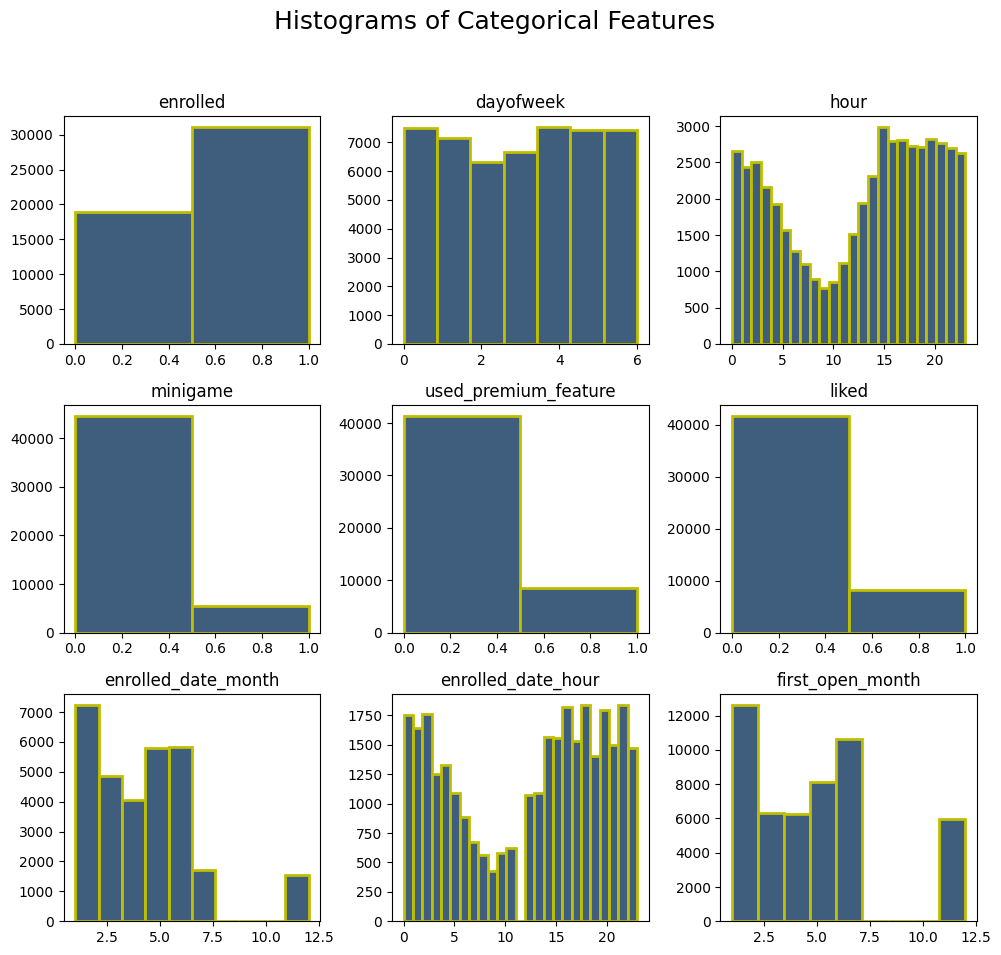

In [18]:
df_cat_filter = df_users_categorical.drop(columns=["first_open", "screen_list", "enrolled_date"]).copy()

# Set figure size & title
plt.figure(figsize=(10, 10))
plt.suptitle("Histograms of Categorical Features", fontsize=18)

# Create subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_cat_filter.shape[1] + 1):
    plt.subplot(3, 3, col)
    feat = plt.gca()
    feat.set_title(df_cat_filter.columns.values[col - 1])
    vals = np.size(df_cat_filter.iloc[:, col - 1].unique())
    plt.hist(df_cat_filter.iloc[:, col - 1], bins=vals, color="#3F5D7D", edgecolor="y", linewidth=2.0)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Label Distribution

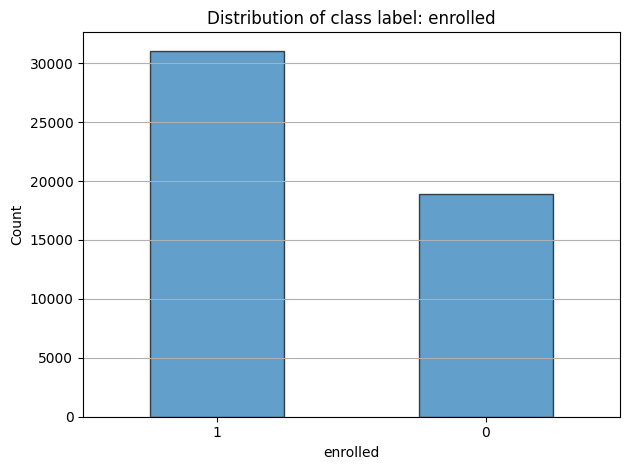

Users Enrolled:     31067 out of 49985
Users Not Enrolled: 18918 out of 49985


In [19]:
# Count the occurrences of each value
value_counts = df_users["enrolled"].value_counts()

# Create a bar plot
value_counts.plot(kind="bar", edgecolor="black", alpha=0.7)
plt.title("Distribution of class label: enrolled")
plt.xlabel("enrolled")
plt.ylabel("Count")
plt.xticks(rotation=0)  # keep x-axis labels horizontal
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Get the number of samples
samples = df_users.shape[0]

print("Users Enrolled:    ", (df_users.enrolled == 1).sum(), f"out of {samples}")
print("Users Not Enrolled:",(df_users.enrolled == 0).sum(), f"out of {samples}")

We observe a **class imbalance** in our label data

### Box Plots

In [20]:
# Dictionary of colors for box plot elements
colors = {
  "boxes": "skyblue",
  "whiskers": "blue",
  "medians": "red",
  "caps": "grey"
  }

- Numerical Field: **age**

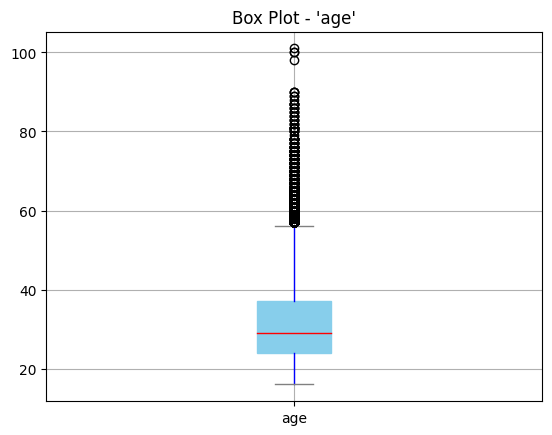

count    49985.000000
mean        31.723777
std         10.803720
min         16.000000
25%         24.000000
50%         29.000000
75%         37.000000
max        101.000000
Name: age, dtype: float64

In [21]:
df_users_numerical.boxplot(column=["age"], color=colors, patch_artist=True)
plt.title("Box Plot - 'age'")
plt.show()

df_users_numerical["age"].describe()

- Numerical Field: **numscreens**

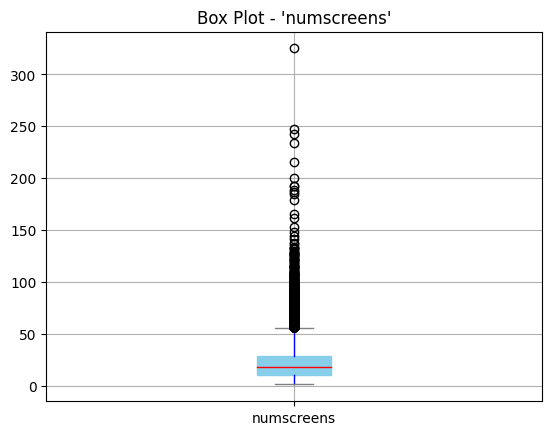

count    49985.000000
mean        21.096349
std         15.728734
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max        325.000000
Name: numscreens, dtype: float64

In [22]:
df_users_numerical.boxplot(column=["numscreens"], color=colors, patch_artist=True)
plt.title("Box Plot - 'numscreens'")
plt.show()

df_users_numerical["numscreens"].describe()

Here we define a forgiving threshold for removing outliers in 'numscreens' that if utilized will effect less than 150 of our 49,985 samples

Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers


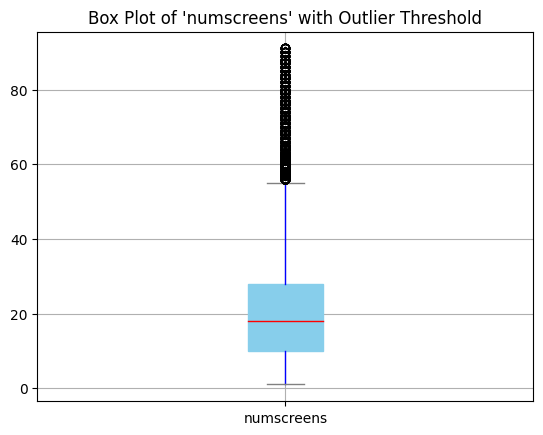

count    49844.000000
mean        20.824914
std         14.778043
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         91.000000
Name: numscreens, dtype: float64

In [23]:
# Call the function
df_users_wo_outliers = remove_outliers_with_threshold(4.5, df_users, "numscreens")
  
# Display box plot
df_users_wo_outliers.boxplot(column="numscreens", color=colors, patch_artist=True)
plt.title("Box Plot of 'numscreens' with Outlier Threshold")
plt.show()

df_users_wo_outliers["numscreens"].describe()

Below we **remove outliers** in 'numscreens' from our datasets 

In [24]:
df_users = remove_outliers_with_threshold(4.5, df_users, "numscreens")
df_users_numerical = remove_outliers_with_threshold(4.5, df_users_numerical, "numscreens")

Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers
Filtered the DataFrame to exclude rows in 'numscreens' beyond a 4.5 threshold for identifying outliers


### Correlation with Response

Note these estimated correlations are linear in nature and may not represent the correlations found within nonlinear models

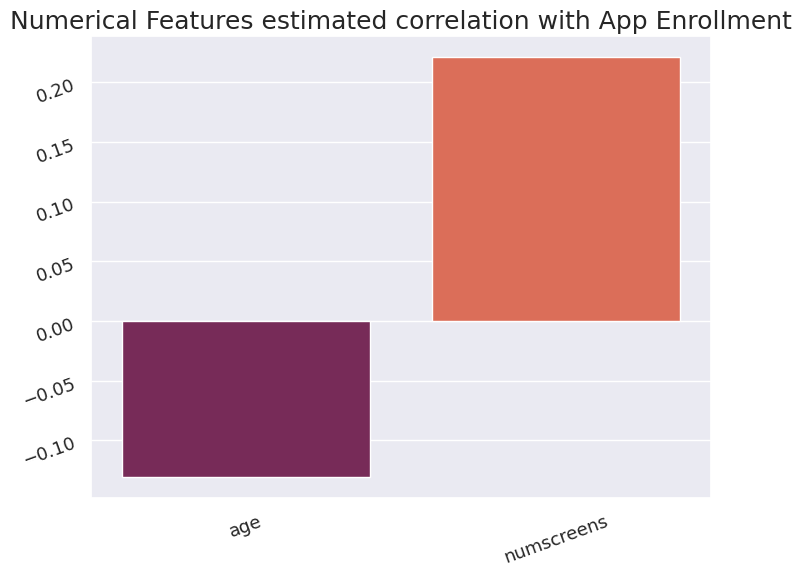

In [25]:
# Set Seaborn
sn.set()
# Set figure size and title
plt.figure(figsize=(8,6))
plt.title("Numerical Features estimated correlation with App Enrollment",fontsize=18)

# Seaborn barplot
ax = sn.barplot(x=df_users_numerical.columns, y=df_users_numerical.corrwith(df_users.enrolled), palette="rocket")
ax.tick_params(labelsize=13, labelrotation=20, color='k')

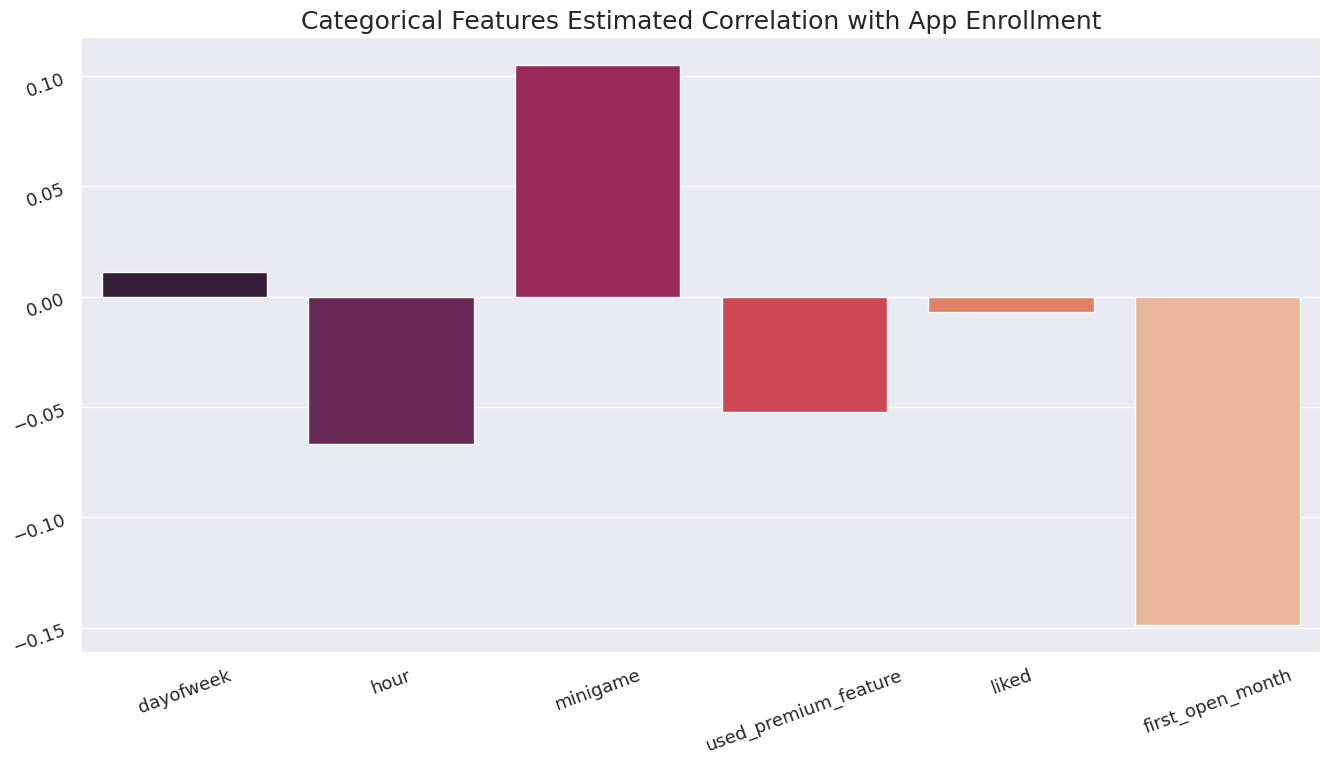

In [26]:
# Filter categorical fields for correlation with response
columns_to_drop = ["enrolled", "enrolled_date_month", "enrolled_date_hour"]
df_categorical = df_cat_filter.drop(columns=columns_to_drop).copy()

# Ensure all columns in are of a numeric data type for correlation 
df_categorical = df_categorical.apply(pd.to_numeric, errors='coerce')

# Set Seaborn and plot
sn.set()
plt.figure(figsize=(16, 8))
plt.title("Categorical Features Estimated Correlation with App Enrollment", fontsize=18)
ax = sn.barplot(x=df_categorical.columns, y=df_categorical.corrwith(df_users.enrolled), palette="rocket")
ax.tick_params(labelsize=13, labelrotation=20, color='k')


### Correlation Matrix

Estimate fields that are positively and negatively correlated to each other, checking for linear dependence

In [27]:
def feature_correlation_matrix(your_feature_df, width, height):
    """
    Accepts a DataFrame of the features to plot, the width, and the height of the plot. 
    """
    # Seaborn
    sn.set(style="white")
    # Compute the correlation matrix
    corr = your_feature_df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Setup the matplotlib figure 
    f, ax = plt.subplots(figsize=(width, height))
    # Adjust the top margin & title
    f.subplots_adjust(top=0.95)
    f.suptitle("Feature Correlation Matrix", fontsize = 18)
    # Generate a custom diverging colormap
    cmap = sn.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

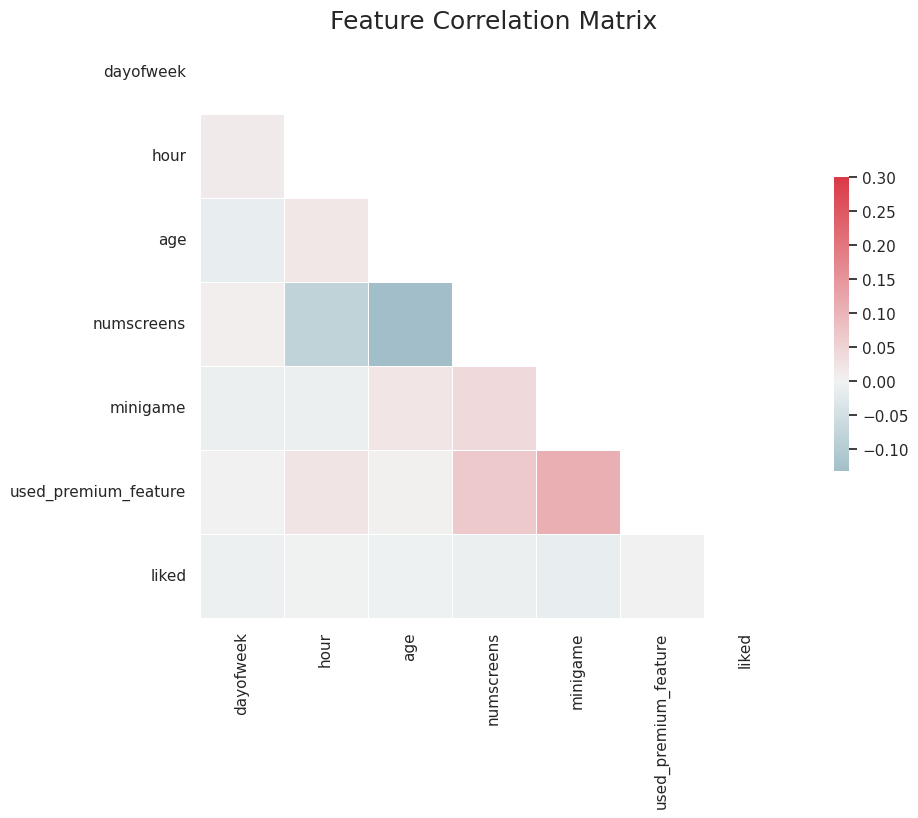

In [28]:
# Get features of interest
features_of_interest = ["dayofweek", "hour", "age", "numscreens", "minigame", "used_premium_feature", "liked"]
df_users_features = df_users[features_of_interest]

feature_correlation_matrix(df_users_features, 12, 7)

# Feature Engineering ⚒️

### Target Transformation

Here we want to estimate a cut-off for enrollment wait time. This is because we need to have a way to validate the model for future datasets. For example, if the model was to predict an enrollment timeframe of 6 months, then we would have to wait 6 months to evaluate if the model was accurate or not.

In [29]:
# Calculate the difference between 'first_open' and 'enrolled_date', converting to hours
df_users["enroll_date_difference"] = (df_users.enrolled_date - df_users.first_open) / pd.Timedelta(hours=1)

Visualize Distributions

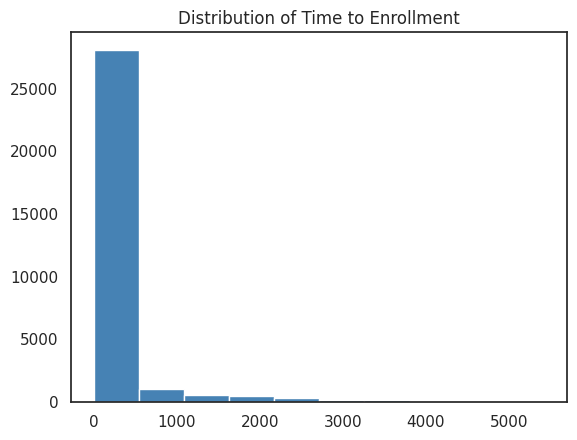

count    30971.000000
mean       190.825776
std        621.099415
min          0.000000
25%          0.043052
50%          0.118686
75%         16.734374
max       5434.686945
Name: enroll_date_difference, dtype: float64

In [30]:
# Plot a histogram of the resulting calculations
plt.hist(df_users["enroll_date_difference"].dropna().copy(), color="steelblue")
plt.title("Distribution of Time to Enrollment")
plt.show()

df_users["enroll_date_difference"].describe()

In [31]:
# Define wait times for user enrollment
time_to_enroll = [96, 72, 48, 24, 12, 1, 0.5, 0.25]
 
total_enrolled_count = df_users[df_users["enrolled"] == 1]["enrolled"].count()
print(f"Total number of users that enrolled: {total_enrolled_count}")

for time in time_to_enroll:
  # Filter enrolled data 
  enrolled_user_df = df_users[df_users["enroll_date_difference"] <= time].copy()
  # Get a count of enrolled users
  filtered_enroll_count = enrolled_user_df[enrolled_user_df["enrolled"] == 1]["enrolled"].count()
  # Calculate percentage 
  percentage = round((filtered_enroll_count / total_enrolled_count) * 100, 2)
  
  print(f"Count of users that enrolled within {time:4} hrs: {filtered_enroll_count}, Enrollment percentage: {percentage}%")

Total number of users that enrolled: 30971
Count of users that enrolled within   96 hrs: 25652, Enrollment percentage: 82.83%
Count of users that enrolled within   72 hrs: 25247, Enrollment percentage: 81.52%
Count of users that enrolled within   48 hrs: 24703, Enrollment percentage: 79.76%
Count of users that enrolled within   24 hrs: 23781, Enrollment percentage: 76.78%
Count of users that enrolled within   12 hrs: 22887, Enrollment percentage: 73.9%
Count of users that enrolled within    1 hrs: 20807, Enrollment percentage: 67.18%
Count of users that enrolled within  0.5 hrs: 19948, Enrollment percentage: 64.41%
Count of users that enrolled within 0.25 hrs: 18355, Enrollment percentage: 59.27%


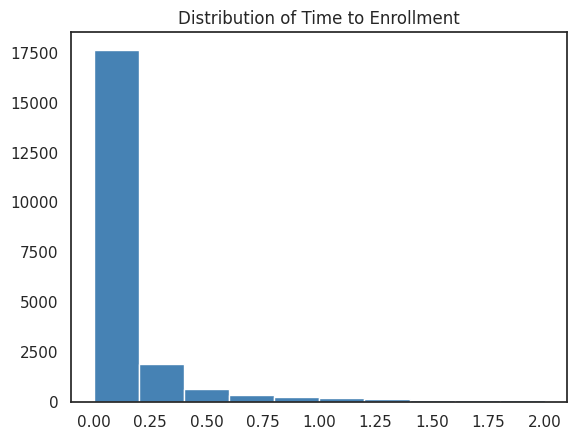

In [32]:
# Create another plot for time to enrollment, restricting to 2 hours
plt.hist(df_users["enroll_date_difference"].dropna().copy(), color="steelblue", range = [0, 2])
plt.title("Distribution of Time to Enrollment")
plt.show()

- We observe that approximately 67.18% of enrollments occur within the first hour of the user engaging with the application
- With a large majority of those enrollments occurring within the first 15 minutes
- This data is an excellent indicator of those likely to purchase a paid subscription
- However, we aim to predict those not likely to subscribe shortly after the free 24-hour trial period completes 
- Below we define a cut-off for enrollment wait time in which we modify our labels to only associate data to a positive class if the user subscribed within 72-hours

In [33]:
# Reset all users who enrolled after 72 hours to a negative 'enrolled' status for the model 
df_users.loc[df_users.enroll_date_difference > 72, "enrolled"] = 0

# Remove data no longer needed
df_users = df_users.drop(columns=["enroll_date_difference", "enrolled_date", "first_open"])

- Visualize the **new class label distribution**

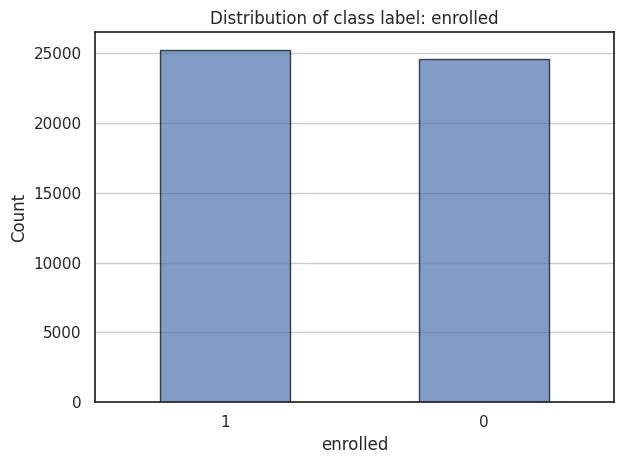

Users Enrolled:     25247 out of 49844
Users Not Enrolled: 24597 out of 49844


In [34]:
# Count the occurrences of each value
value_counts = df_users["enrolled"].value_counts()

# Create a bar plot
value_counts.plot(kind="bar", edgecolor="black", alpha=0.7)
plt.title("Distribution of class label: enrolled")
plt.xlabel("enrolled")
plt.ylabel("Count")
plt.xticks(rotation=0)  # keep x-axis labels horizontal
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Get the number of samples
samples = df_users.shape[0]

# Display counts
print("Users Enrolled:    ", (df_users.enrolled == 1).sum(), f"out of {samples}")
print("Users Not Enrolled:", (df_users.enrolled == 0).sum(), f"out of {samples}")

- We observe a significant class imbalance is no longer present

### Feature Creation

Process **'screen_list'** data. First we import data for the most viewed screens as an array of values

In [35]:
top_screens = pd.read_csv("../data/processed/top_app_screens.csv").top_screens.values

- Create fields for the most viewed screens and record if they are present in the user's 'screen_list'
- Include a column for a count of other screens viewed by the user

In [36]:
# Add a comma to the string list, creating as many commas as there are strings for a later count
df_users["screen_list"] = df_users.screen_list.astype(str) + ","

for screen in top_screens:
    # Create a column for the popular screen and evaluate if present in the user's screen_list
    df_users[screen] = df_users.screen_list.str.contains(screen).astype(int)
    
    # Remove the top screen from the user's screen_list then replace with a comma
    df_users["screen_list"] = df_users.screen_list.str.replace(screen + ",", "")

# Create a column with a count for other screens viewed by the user
df_users["OtherScreens"] = df_users.screen_list.str.count(",")

# Drop the no longer needed 'screen_list'
df_users = df_users.drop(columns=["screen_list"])

- Inspect processed 'screen_list' results

In [37]:
# Adjust Pandas to show all columns and rows
pd.set_option("display.max_columns", None)  
pd.set_option("display.max_rows", None) 

# Get a count of columns
print("Column Count: ", df_users.shape[1])

# Display stats
df_users.describe()

Column Count:  68


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens
count,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.0,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000,49844.000000
mean,186897.636987,3.028730,31.732425,20.824914,0.107756,0.172037,0.506520,0.165055,0.505638,0.516973,0.292653,0.328665,0.524135,0.318734,0.472715,0.155967,0.422639,0.364557,0.340563,0.190073,0.143106,0.058944,0.200546,0.122201,0.086289,0.082859,0.104205,0.194286,0.047488,0.107576,0.076338,0.028710,0.058523,0.053868,0.072506,0.054029,0.047629,0.051220,0.043215,0.053206,0.044178,0.030315,0.040547,0.045843,0.0,0.043937,0.026342,0.039503,0.024276,0.025780,0.023273,0.030796,0.016191,0.019962,0.014365,0.019220,0.021728,0.029472,0.020444,0.095679,0.014184,0.016070,0.013342,0.013021,0.008165,0.007403,6.198620
std,107772.516054,2.032019,10.806681,14.778043,0.310075,0.377416,0.499962,0.371234,0.499973,0.499717,0.454985,0.469733,0.499422,0.465991,0.499260,0.362827,0.493984,0.481311,0.473903,0.392363,0.350185,0.235522,0.400413,0.327521,0.280793,0.275671,0.305530,0.395654,0.212683,0.309847,0.265541,0.166991,0.234731,0.225759,0.259327,0.226076,0.212981,0.220448,0.203342,0.224446,0.205492,0.171453,0.197239,0.209147,0.0,0.204957,0.160152,0.194791,0.153906,0.158481,0.150770,0.172767,0.126209,0.139872,0.118991,0.137299,0.145795,0.169127,0.141514,0.294153,0.118251,0.125747,0.114734,0.113364,0.089994,0.085723,3.655998
min,13.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [38]:
# Drop the empty column observed above
df_users = df_users.drop(columns=["ProfileChildren "])

### Feature Transformations

- Aggregate correlated screen data

In [39]:
# Credit Card Screens funnel
credit_card_screens = ["CC1", "CC1Category", "CC3"]

df_users["CreditCardScreens"] = df_users[credit_card_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_card_screens)

# Credit Monitoring Screens funnel
credit_monitoring_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]

df_users["CreditMonitoringScreens"] = df_users[credit_monitoring_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_monitoring_screens)

# Loan Screens funnel
loan_screens = ["Loan", "Loan2", "Loan3", "Loan4"]

df_users["LoanScreens"] = df_users[loan_screens].sum(axis=1)
df_users = df_users.drop(columns=loan_screens)

# Savings Screens funnel
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5",
                   "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]

df_users["SavingsScreens"] = df_users[savings_screens].sum(axis=1)
df_users = df_users.drop(columns=savings_screens)

print("Column Count: ", df_users.shape[1])
df_users.head()

Column Count:  49


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens,CreditCardScreens,CreditMonitoringScreens,LoanScreens,SavingsScreens
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,1,0
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,1,0


### Correlation Matrix

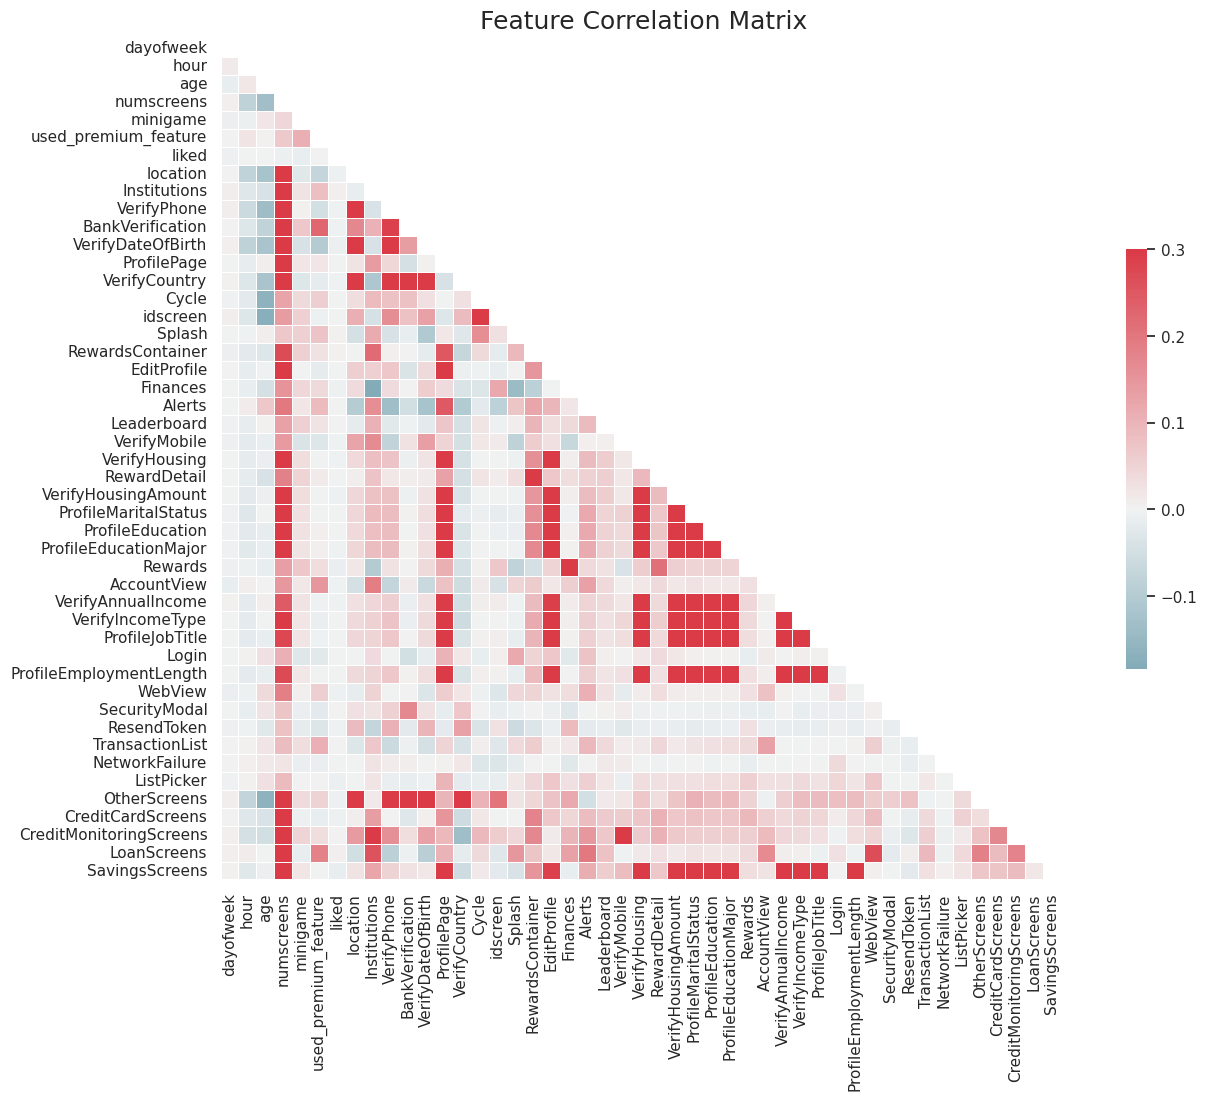

In [40]:
columns_to_exclude = ["user", "enrolled"]

# Get features of interest
features_of_interest = [col for col in df_users.columns if col not in columns_to_exclude]
df_users_features = df_users[features_of_interest]

feature_correlation_matrix(df_users_features, 17, 10)

As anticipated, the newly added screen data shows an elevated positive correlation. We will evaluate these features in Model Building 🤖

## Save Dataset 💾

In [41]:
df_users.to_csv("../data/processed/new_app-user-data.csv", index=False)

## Conclusions

We estimate from the data above that if a user were to enroll in a paid subscription to the application, approximately 76.78 percent of them would have already done so by the end of the free 24-hour trial period. On the basis of that estimate, there is only a 23.22 percent chance the user will enroll in a paid subscription after the 24-hour trial without intervention.